In [1]:
import pandas as pd
import numpy as np
import IPython.display as display
import matplotlib.pyplot as plt 
import datetime
import seaborn as sns 

get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn.model_selection import train_test_split   # This is to prepare the data for the model
from sklearn.tree import DecisionTreeClassifier 

## - for EDA
from scipy.stats import norm 
import seaborn as sns

# - use if you need this library (heatmaps) :  get_ipython().system('pip install folium ')
import folium
from folium import plugins 

In [3]:
# Importing the raw data- 2.34 GB
df=pd.read_csv(r'nyc_taxi_data_2014.csv', low_memory=False)


In [12]:
df.head(30)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,tip_amount,total_amount,trip_duration_min,pickup_location,dropoff_location
0,CMT,2014-01-09 20:45:25,2014-01-09 20:52:31,1,1.13,-73.994770,40.736828,-73.982227,40.731790,CRD,6.5,1.40,8.90,7.10,-1.816410,-1.816326
1,CMT,2014-01-09 20:46:12,2014-01-09 20:55:12,1,2.25,-73.982392,40.773382,-73.960449,40.763995,CRD,8.5,1.90,11.40,9.00,-1.814478,-1.814357
2,CMT,2014-01-09 20:44:47,2014-01-09 20:59:46,2,3.70,-73.988570,40.739406,-73.986626,40.765217,CRD,11.5,1.50,14.00,14.98,-1.816143,-1.814945
3,CMT,2014-01-09 20:44:57,2014-01-09 20:51:40,1,2.74,-73.960213,40.770464,-73.979863,40.777050,CRD,7.5,1.70,10.20,6.72,-1.814064,-1.814252
4,CMT,2014-01-09 20:47:09,2014-01-09 20:53:32,1,1.45,-73.995371,40.717248,-73.984367,40.720524,CRD,6.0,1.75,8.75,6.38,-1.817298,-1.816882
5,CMT,2014-01-09 20:45:07,2014-01-09 20:51:01,1,1.45,-73.983811,40.749655,-73.989747,40.756575,CRD,6.0,1.40,8.40,5.90,-1.815569,-1.815406
6,CMT,2014-01-09 20:44:04,2014-01-09 21:05:45,1,5.79,-73.984138,40.726317,-73.962869,40.758443,CRD,16.5,5.25,22.75,21.68,-1.816617,-1.814664
7,CMT,2014-01-09 20:43:23,2014-01-09 20:52:07,1,3.38,-73.979906,40.745850,-73.959090,40.773639,CRD,9.0,2.00,12.00,8.73,-1.815643,-1.813895
8,CMT,2014-01-09 20:43:04,2014-01-09 20:54:29,1,5.47,-73.981147,40.758918,-73.942510,40.785975,CRD,12.0,2.60,15.60,11.42,-1.815091,-1.812940
9,CMT,2014-01-09 20:50:23,2014-01-09 20:58:10,1,3.70,-73.955193,40.765468,-73.979023,40.740578,CRD,9.0,1.00,11.00,7.78,-1.814163,-1.815856


In [23]:
df.shape

(13278530, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999999 entries, 0 to 14999998
Data columns (total 24 columns):
vendor_id             object
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count       int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
rate_code             int64
store_and_fwd_flag    object
dropoff_longitude     float64
dropoff_latitude      float64
payment_type          object
fare_amount           float64
surcharge             float64
mta_tax               float64
tip_amount            float64
tolls_amount          float64
total_amount          float64
trip_duration_min     float64
pickup_location       float64
dropoff_location      float64
pickup_day            int32
pickup_hour           int32
pickup_month          int32
dtypes: datetime64[ns](2), float64(14), int32(3), int64(2), object(3)
memory usage: 2.5+ GB


In [ ]:
# let's get to know each column by it-self
# Describing the entire DF
df.describe(include='all')

# Data Manipulation


In [4]:
# Trip Duration
#transforming time format and calculating trip duration
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format= '%Y/%m/%d %H:%M')
df['dropoff_datetime']= pd.to_datetime(df['dropoff_datetime'], format= '%Y/%m/%d %H:%M')
df['trip_duration_min'] =  df.dropoff_datetime -df.pickup_datetime
df['trip_duration_min'] = df['trip_duration_min'].astype('timedelta64[s]')
df['trip_duration_min'] = df['trip_duration_min'].astype(int)
df['trip_duration_min'] = (df['trip_duration_min']/ 60).round(2)
df['pickup_location'] = (df.pickup_longitude / df.pickup_latitude)
df['dropoff_location'] = (df.dropoff_longitude / df.dropoff_latitude)

In [5]:
# Distance Mile to Km (1 - 1.609344)
df['trip_distance'] = (df['trip_distance'] / 0.62137).round(2)

In [6]:
# Extracting Hour, Day of the Week and Month
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df["pickup_day"] = df["pickup_datetime"].dt.strftime('%u').astype(int)
df["pickup_hour"] = df["pickup_datetime"].dt.strftime('%H').astype(int)
df["pickup_month"] = df["pickup_datetime"].dt.strftime('%m').astype(int)

In [ ]:
len(trip_duration_min)

In [ ]:
#Split the Day value out from the Date
#df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format = '%Y/%m/%d')
#df['day'] = df['pickup_datetime'].dt.day
#df.insert(loc = 2, column = 'day', value = int, allow_duplicates = True)
df['day'] = df.pickup_datetime.dt.weekday_name

# Data Cleaning - Dropping 

In [ ]:
# dropping unnecessary colummns: <br>
# 1. mta_tax- 0.50 dollar MTA tax that is automatically triggered based on the metered rate in use, is the same for all rows<br>
# 2. Store_and_fwd_flag- This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,”because the vehicle did not have a connection to the server. <br> 
# Y= store and forward trip , N= not a store and forward trip <br>
# 3. surcharge- Miscellaneous extras and surcharges. Currently, this only includes the 0.50 dollar and 1 dollar rush hour and overnight charges. <br>
# 4. Tolls_amount- Total amount of all tolls paid in trip by the passenger. <br>

In [ ]:
df.isnull().sum()

In [ ]:
#  Cleaning data : 
# 1) droping store and fwd flag (lots of NaN),
# 2) droping 143 NaN in locations
# 3) droping All trip_duration under 0 minutes (negative time) 
# 4) droping All trip_distance under 0 
# 5) droping all trip_Location that are 00000

In [37]:
df=df.drop(['mta_tax','surcharge','store_and_fwd_flag','tolls_amount'], axis=1)
df = df.dropna()
df = df[df['trip_duration_min'] > 0]
df = df[df['trip_distance'] > 0 ]
df = df[df['pickup_longitude'] != 0]
df = df[df['dropoff_longitude'] != 0]
df = df[df['pickup_latitude'] != 0]
df = df[df['dropoff_latitude'] != 0]
df = df[df['passenger_count'] > 0]
df = df[df['passenger_count'] < 5 ]
# df = df[df['trip_duration_min'] <20] # this should be re-examined!!!!


In [43]:
### What is Rate code? df = df[df['rate_code'] <= 5]  - its the the rate_fare applied on the taxicabs trips - 
df = df[df['trip_duration_min'] < 60]


In [13]:
df=df.drop(['pickup_longitude',"pickup_latitude",'dropoff_longitude', 'dropoff_latitude'], axis=1)
df=df.drop(['rate_code'], axis=1)

In [ ]:
#Cliping..... do not use 
#df = df[df['trip_distance'] < 30 ]
#df = df[df['trip_duration_min'] < 60 ]



In [ ]:
# Validation Checks:

In [40]:
df[df.trip_duration_min > 100 ]

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,tip_amount,total_amount,trip_duration_min,pickup_location,dropoff_location,pickup_day,pickup_hour,pickup_month


In [36]:
df[df.trip_distance > 100]

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,tip_amount,total_amount,trip_duration_min,pickup_location,dropoff_location,pickup_day,pickup_hour,pickup_month
11580,CMT,2014-01-09 22:22:14,2014-01-09 22:42:59,1,132.13,CRD,20.00,5.25,26.25,20.75,-1.815926,-1.816430,4,22,1
33723,CMT,2014-01-10 05:43:48,2014-01-10 06:12:20,1,135.51,CRD,34.50,3.00,38.50,28.53,-1.812572,-1.816563,5,5,1
122880,CMT,2014-01-10 18:16:53,2014-01-10 18:48:53,1,144.68,CRD,21.50,6.90,29.90,32.00,-1.816222,-1.813381,5,18,1
226264,CMT,2014-01-11 13:22:07,2014-01-11 13:40:16,1,131.48,CRD,13.50,2.80,16.80,18.15,-1.815307,-1.816896,6,13,1
344837,CMT,2014-01-11 17:48:44,2014-01-11 18:05:45,2,134.06,CRD,15.00,3.10,18.60,17.02,-1.817924,-1.814896,6,17,1
413049,CMT,2014-01-12 20:02:54,2014-01-12 21:24:11,1,102.84,CRD,240.00,10.00,250.00,81.28,-1.815289,-1.830044,7,20,1
423010,CMT,2014-01-06 03:36:21,2014-01-06 04:15:04,1,158.20,CSH,2.50,0.00,14.16,38.72,-1.815131,-1.812999,1,3,1
505159,CMT,2014-01-06 17:09:47,2014-01-06 18:08:19,1,131.32,CSH,2.50,0.00,9.33,58.53,-1.815718,-1.815047,1,17,1
516025,CMT,2014-01-06 15:23:47,2014-01-06 16:49:02,1,117.00,CSH,2.50,0.00,9.33,85.25,-1.814910,-1.814235,1,15,1
517327,CMT,2014-01-07 01:19:24,2014-01-07 01:45:47,1,112.01,CSH,40.00,0.00,40.00,26.38,-1.812810,-1.815459,2,1,1


In [26]:
df['rate_code'].value_counts()

KeyError: 'rate_code'

# Split _ Train- Test- Valid

In [72]:
# Data Split - Train _Test

train_df_all, test_df= train_test_split (df, test_size = 0.2, random_state=7) # train_test_split is from sklearn. It requiers that the data will be a numpy array, that is numbers only.
train_df, valid_df= train_test_split (train_df_all, test_size = 0.2, random_state=7) # train_test_split is from sklearn. It requiers that the data will be a numpy array, that is numbers only.
# If your prediction class in y is very small, then add a parameter startify = y




In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8470689 entries, 299395 to 6966820
Data columns (total 15 columns):
vendor_id            object
pickup_datetime      datetime64[ns]
dropoff_datetime     datetime64[ns]
passenger_count      int64
trip_distance        float64
payment_type         object
fare_amount          float64
tip_amount           float64
total_amount         float64
trip_duration_min    float64
pickup_location      float64
dropoff_location     float64
pickup_day           int32
pickup_hour          int32
pickup_month         int32
dtypes: datetime64[ns](2), float64(7), int32(3), int64(1), object(2)
memory usage: 937.1+ MB


# EDA - exploratory data analysis

categorical feature

In [ ]:
train_df.describe().round(2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022EC6B47B00>,
      dtype=object)

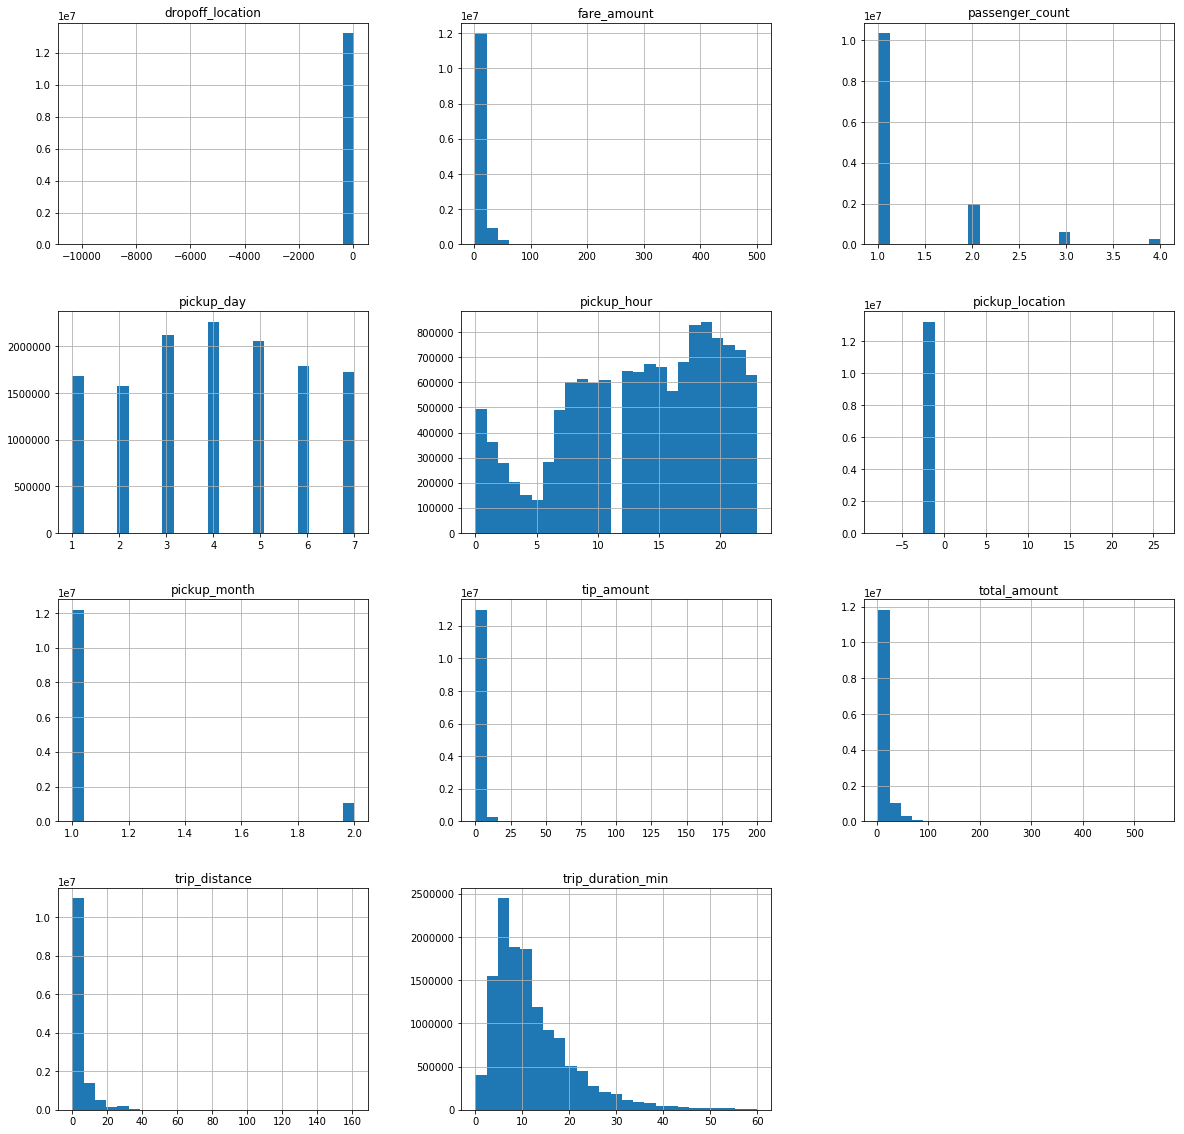

In [58]:
df.hist(figsize=(20,20), bins=25)

In [ ]:
sns.distplot(df["trip_distance"], fit=norm)

In [ ]:
sns.distplot(df["trip_duration_min"])

In [ ]:
#Trip duration hist
from scipy.stats import norm 
import seaborn as sns
sns.distplot(df["trip_duration_min"], fit=norm)

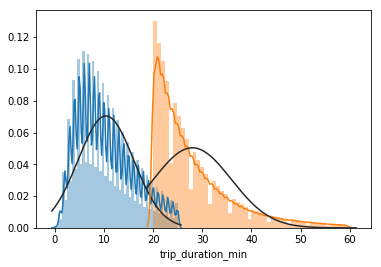

In [49]:
#spliting data trip duration - 1. Local in Manhattan 2. Out of Manhattan
duration_norm_big = df[df["trip_duration_min"] <= 25] 
duration_norm_small = df[df["trip_duration_min"] >= 20] 
sns.distplot(duration_norm_big["trip_duration_min"], fit=norm)
sns.distplot(duration_norm_small["trip_duration_min"], fit=norm)

In [ ]:
## Cliping

trip_duration_min_2 = np.clip(df['trip_duration_min'], 0 , 20)

plt.hist(df['trip_duration_min'], bins=10)
plt.hist(trip_duration_min_2, bins=38, color='red', alpha = 0.5)
plt.show()

In [ ]:
<b>Finding correlations using scatter plots</b>

In [ ]:
sns.countplot(x='vendor_id', data=train_df)

In [ ]:
train_df.payment_type.value_counts()

In [ ]:
fig1, ax1 = plt.subplots()

slices = df["passenger_count"].value_counts()
labels = slices.index
ax1.pie(slices, autopct='%1.1f%%', labels=labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
fig1, ax1 = plt.subplots()

slices = df["payment_type"].value_counts()
labels = slices.index
ax1.pie(slices, autopct='%1.1f%%', labels=labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
sns.countplot(x='day', data=df, color='blue')

##Numerical Features

In [ ]:
train_df.hist(bins = 400, figsize = (20,15)) #Check the hist parameters by clicking on the Tab completion. 
plt.show()

In [ ]:
train_df_numeric = train_df # iloc = integer-location based indexing for selection by position
corr_df=train_df_numeric.corr()
corr_df

In [ ]:
sns.heatmap(corr_df)

In [ ]:
sns.heatmap(corr_df[(corr_df<1) & ((corr_df >= 0.3) | (corr_df <= -0.3)) ] )

In [ ]:
sns.pairplot(train_df_numeric, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.05}})

# Saving Data 

In [51]:
import pickle # pickle is a package to code Python output: data and models

In [52]:
pickle.dump(train_df_all, open("train_df_all.dat", "wb")) # wb = write binary
train_df_read = pickle.load(open("train_df_all.dat", "rb"))

In [53]:
pickle.dump(test_df, open("test_df.dat", "wb"))

In [ ]:
#pickle.dump(train_df_std, open("train_df_std.dat", "wb"))
#pickle.dump(test_df_std, open("test_df_std.dat", "wb"))

In [54]:
pickle.dump(valid_df, open("valid_df.dat", "wb")) # wb = write binary
valid_df_read = pickle.load(open("valid_df.dat", "rb"))

# HeatMaps Module


In [ ]:
train_df.describe().round(2)

In [20]:
# Pickup Data
nyc_map_pickup = folium.Map([40.7306,-73.935242], zoom_start=11)
data=valid_df
for index, row in data.iterrows():
    folium.CircleMarker([row['pickup_latitude'], row['pickup_longitude']],
                        radius=1,
                        fill=True,
                        fill_color="blue", 
                        fill_opacity=0.005,
                       )#.add_to(nyc_map) if you want to add points/markers to the map - does not look well with heatmaps


KeyError: 'pickup_latitude'

In [ ]:
# Pickup Data convert to (n, 2) nd-array format for heatmap
pickupArr = data[['pickup_latitude', 'pickup_longitude']].as_matrix()

In [ ]:
# Pickup Data plot heatmap
nyc_map_pickup.add_child(plugins.HeatMap(pickupArr, radius=15))

In [ ]:
# Dropoff Data
nyc_map_dropoff = folium.Map([40.7306,-73.935242], zoom_start=11)
data=train_df
for index, row in data.iterrows():
    folium.CircleMarker([row['dropoff_latitude'], row['dropoff_longitude']],
                        radius=1,
                        fill=True,
                        fill_color="blue", 
                        fill_opacity=0.005,
                       )#.add_to(nyc_map) if you want to add points/markers to the map - does not look well with heatmaps

dropoffArr = df[['dropoff_latitude', 'dropoff_longitude']].as_matrix()

# plot heatmap
nyc_map_dropoff.add_child(plugins.HeatMap(dropoffArr, radius=15))


# Classification decision trees 

In [21]:
train_df = pickle.load(open("", "rb")) #note to call the file from correct folder
test_df = pickle.load(open("", "rb"))

NameError: name 'pickle' is not defined

In [ ]:
tree_class = DecisionTreeC/lassifier()
tree_class.fit(X_train, y_train)

In [ ]:
tree_class.fit(X_train, y_train)

In [ ]:
tree_class.score(X=X_test, y=y_test) 

In [ ]:
#Predict / Deploy model
example = X_test[7:10,]
example

In [ ]:
predicted_y = tree_class.predict(X=example)
predicted_y

In [ ]:
y_test[7:10,]

# Clustering normalization

In [59]:
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [75]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2124565 entries, 1926604 to 536371
Data columns (total 20 columns):
vendor_id            object
pickup_datetime      datetime64[ns]
dropoff_datetime     datetime64[ns]
passenger_count      int64
trip_distance        float64
pickup_longitude     float64
pickup_latitude      float64
rate_code            int64
dropoff_longitude    float64
dropoff_latitude     float64
payment_type         object
fare_amount          float64
tip_amount           float64
total_amount         float64
trip_duration_min    float64
pickup_location      float64
dropoff_location     float64
pickup_day           int32
pickup_hour          int32
pickup_month         int32
dtypes: datetime64[ns](2), float64(11), int32(3), int64(2), object(2)
memory usage: 316.1+ MB


In [76]:
train_df=df.drop(['vendor_id','pickup_datetime','dropoff_datetime','payment_type','pickup_longitude', "pickup_latitude"
                 ,'dropoff_longitude', 'dropoff_latitude'], axis=1)

In [28]:
X = train_df[['pickup_location','pickup_hour']]

from sklearn.preprocessing import StandardScaler

#change1
sts = StandardScaler()
X = sts.fit_transform(X)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


KeyboardInterrupt: 

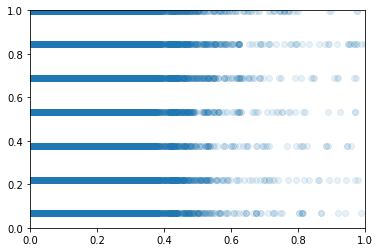

In [29]:
plt.scatter(data = X, x=X[:,0], y=X[:,1], alpha=0.1)

In [62]:
#change2
km = KMeans( n_clusters=3)
y_pred = km.fit_predict(X)

KeyboardInterrupt: 

In [ ]:
km.cluster_centers_

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y_pred, edgecolor='yellow',linewidths=1, s=50)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=200, marker="*")
plt.grid()
plt.show()

In [ ]:
print("Internal Sum of Squares = ", km.inertia_)

# Grid Search

In [77]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [78]:


y_valid = train_df[['trip_duration_min']].values
X_valid = train_df.drop('trip_duration_min', axis = 1).values


In [79]:
##Grid search to predict trip duration with Random Forest

param_n_estimators_range = [10, 20, 40, 80, 160, 320]
param_max_depth_range =  [2, 3, 4, 5] 

param_grid = [{'n_estimators': param_n_estimators_range, 'max_depth':param_max_depth_range},
              {'n_estimators': param_n_estimators_range, 'max_depth':param_max_depth_range, 'bootstrap': ['False']}]



In [80]:
gs = GridSearchCV (estimator=RandomForestRegressor(), param_grid = param_grid, cv=10)

In [ ]:
gs = gs.fit (X=X_valid, y=y_valid.ravel())

In [ ]:
print ('The best score is:', gs.best_score_, '\nThe best parameters are:', gs.best_params_)